## Import Libraries

In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

import numpy as np
import time

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt",force_download=False)

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hanif\.cache\kagglehub\datasets\anshulmehtakaggl\60k-responses-of-16-personalities-test-mbt\versions\23


In [3]:
import time
class StopWatch():
    def __init__(self):
        self.__start_time = 0
        self.__end_time = 0
        self.__elapsed_time = 0
    def start(self):
        self.__start_time = time.time()
        self.__end_time = 0
    def stop(self):
        self.__end_time = time.time()
        self.__elapsed_time = self.__end_time - self.__start_time
    def print(self):
        detik = self.__elapsed_time
        
        jam = detik // 3600
        detik = detik % 3600

        menit = detik // 60
        detik = detik % 60

        print('Waktu eksekusi: ',end='')
        if jam != 0:
            print(int(jam),'jam ',end='')
        if menit != 0:
            print(int(menit),'menit',end='')
        print(f' {detik:.2f}','detik.')
    def get_elapsed_time(self):
        return self.__elapsed_time

In [4]:
import random
import os
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
set_seed()

In [5]:
df = pd.read_csv(path+'/16P.csv', encoding='latin1')
print(f"Data shape: {df.shape}")

Data shape: (59999, 62)


Data Cleaning

In [6]:
# Bersihkan nama fitur dari karakter spesial
quetions = list(df.columns)
quetions_s = pd.Series(quetions,name='Quetions')

df.columns = pd.Index(range(len(quetions))) # merubah kolom menjadi angka
df = df.rename(columns={61:'Personality'})

In [7]:
# 5. Pisahkan fitur dan label
X = df.drop('Personality', axis=1)
y = df['Personality']

In [8]:
# 6. Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 47999, number of used features: 61
[LightGBM] [Info] Start training from score -2.771235
[LightGBM] [Info] Start training from score -2.776911
[LightGBM] [Info] Start training from score -2.772901
[LightGBM] [Info] Start training from score -2.768576
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.779593
[LightGBM] [Info] Start training from score -2.765923
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.777245
[LightGBM] [Info] Start training from score -2.777580
[LightGBM] [Info] Start training from score -2.758008
[LightGBM] [Info] Start training from score -2.773235


C:\Users\hanif\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


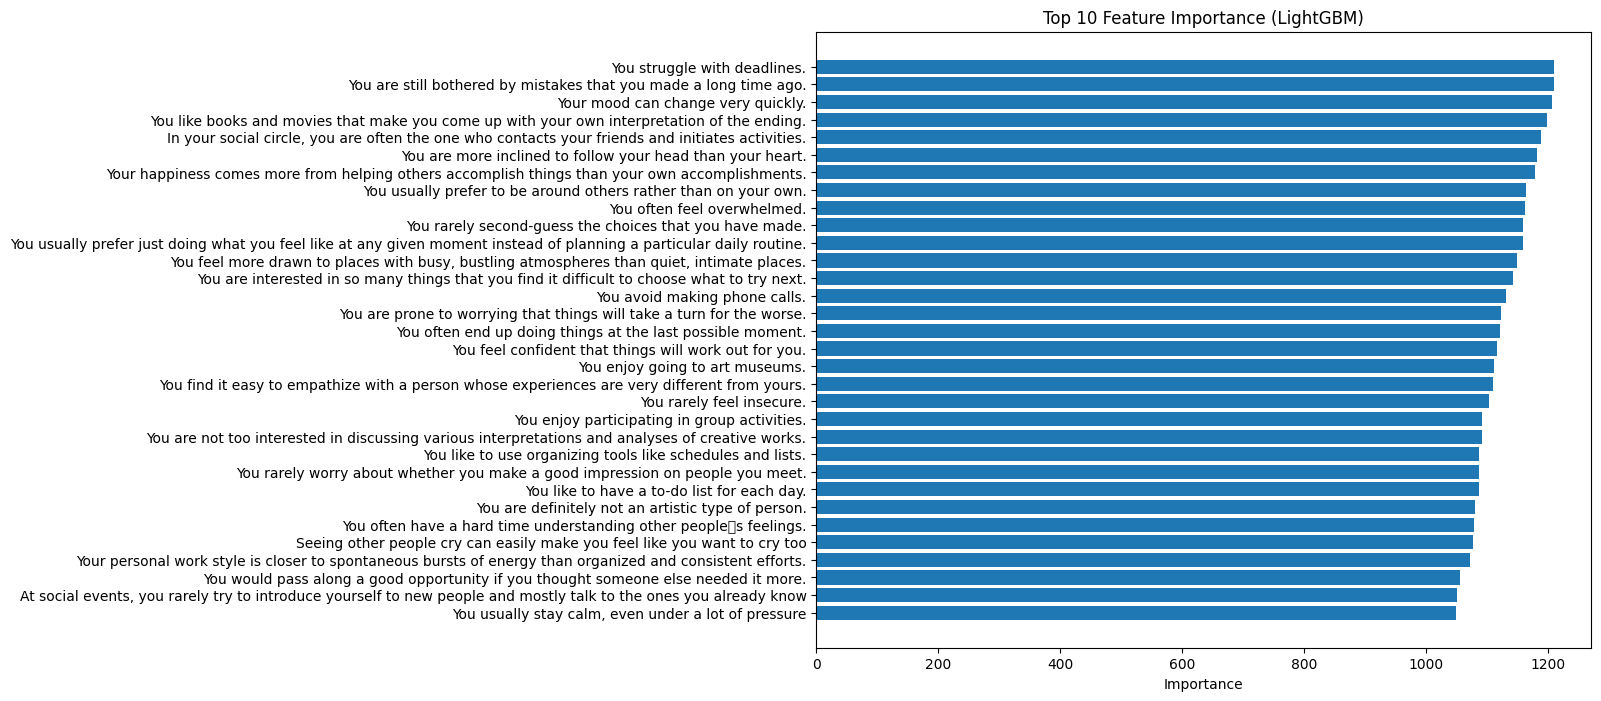

In [9]:
# 7. Train LightGBM
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


n_quetions = 32
# 9. Tampilkan Top n fitur
print(f"Top {n_quetions} Feature Importances:")
print(feature_importances.head(n_quetions))

# 10. Visualisasi
plt.figure(figsize=(10, 8))
plt.barh(quetions_s[feature_importances[:n_quetions].index], feature_importances['Importance'][:n_quetions])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.show()

In [10]:
quetions_s[feature_importances['Feature'][:20]]

59                         You struggle with deadlines.
45    You are still bothered by mistakes that you ma...
27                   Your mood can change very quickly.
17    You like books and movies that make you come u...
43    In your social circle, you are often the one w...
13    You are more inclined to follow your head than...
18    Your happiness comes more from helping others ...
31    You usually prefer to be around others rather ...
55                          You often feel overwhelmed.
35    You rarely second-guess the choices that you h...
14    You usually prefer just doing what you feel li...
53    You feel more drawn to places with busy, bustl...
19    You are interested in so many things that you ...
41                        You avoid making phone calls.
20    You are prone to worrying that things will tak...
29    You often end up doing things at the last poss...
60    You feel confident that things will work out f...
37                      You enjoy going to art m

In [11]:
selected_features = feature_importances[:n_quetions].index

In [12]:
selected_questions = quetions_s[selected_features]

In [13]:
selected_questions.to_json('pertanyaan.json')

In [14]:
for i,q in enumerate(quetions_s[selected_features]):
    print(f'{i+1}. {q}')

1. You struggle with deadlines.
2. You are still bothered by mistakes that you made a long time ago.
3. Your mood can change very quickly.
4. You like books and movies that make you come up with your own interpretation of the ending.
5. In your social circle, you are often the one who contacts your friends and initiates activities.
6. You are more inclined to follow your head than your heart.
7. Your happiness comes more from helping others accomplish things than your own accomplishments.
8. You usually prefer to be around others rather than on your own.
9. You often feel overwhelmed.
10. You rarely second-guess the choices that you have made.
11. You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.
12. You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.
13. You are interested in so many things that you find it difficult to choose what to try next.
14. You avoid making phone calls.
15

In [15]:
# selected_features = [59, 45, 27, 17, 43, 13, 18, 31, 55, 35, 14, 53, 19, 41, 20, 29, 60, 37, 33, 40]

In [16]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

## Modeling

In [17]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import optuna

from sklearn.metrics import accuracy_score

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_processed = label_encoder.fit_transform(y_train)
y_test_processed = label_encoder.transform(y_test)

In [19]:
lgb_minimum_parameter_grid = {"n_estimators","max_depth","learning_rate"}

In [20]:
def train_model(params,X,y):
    try:
        if type(params) != dict or not (lgb_minimum_parameter_grid <= set(params.keys())):
            raise ValueError(f"Parameter Grid harus berupa Python Dictionary dan setidaknya berisi keys ini {lgb_minimum_parameter_grid}")
        elif params['max_depth'] < 1:
            raise ValueError(f"max_depth harus bernilai postif. max_depth yang anda berikan bernilai {params['max_depth']}")
        elif params['n_estimators'] < 2:
            raise ValueError(f"n_estimators harus lebih dari 1. n_estimators yang anda berikan bernilai {params['n_estimators']}")
        elif params['learning_rate'] >= 1:
            raise ValueError(f"learning_rate harus bernilai kurang dari 1. learning_rate yang anda berikan bernilai {params['learning_rate']}")
        elif X.select_dtypes(exclude='number').columns.shape[0] > 0:
            raise ValueError(f"Tipe data features harus number")
        elif y.dtype != np.dtype(int):
            raise ValueError(f"Tipe data target harus number")

        model = LGBMClassifier(**params, objective='multiclass', random_state=42,verbose=-1)
        sw = StopWatch()
        sw.start()
        model.fit(X,y)
        sw.stop()

        return model,sw
    except ValueError as ve:
        print("ValueError:",ve)
    except Exception as e:
        print("Exception:",e)

In [21]:
def test_model(model,X_test,y_test):
    try:
        train_features = [59, 45, 27, 17, 43, 13, 18, 31, 55, 35, 14, 53, 19, 41, 20, 29, 60, 37,
       33, 40, 16, 12,  9, 15, 39, 22, 38,  3, 49, 58,  6,  5]
        if list(X_test.columns) != train_features:
            raise ValueError(f"Features data uji tidak sama dengan Features data latih")
        
        sw = StopWatch()
        sw.start()
        y_pred = model.predict(X_test)
        sw.stop()
        score = accuracy_score(y_test,y_pred)
        elapsed_time = sw.get_elapsed_time()

        if (elapsed_time / X_test.shape[0] ) > 10:
            raise ValueError(f"Model terlalu lambat dalam memprediksi. Rata-rata waktu prediksi perbaris adalah {(elapsed_time / X_test.shape[0] ):.4f} detik.")
        
        prev_predict = y_pred
        for i in range(5):
            current_predict = model.predict(X_test)
            if accuracy_score(prev_predict,current_predict) != 1:
                raise ValueError(f"Hasil Prediksi tidak konsisten")
            prev_predict = current_predict

        if score < 0.8:
            raise ValueError(f"Akurasi di bawah 80%. Akurasi saat ini adalah {score}")
        
        return score,y_pred,sw
    except ValueError as ve:
        print(ve)

In [22]:
lgb_params = {'n_estimators': 841,
 'max_depth': 6,
 'learning_rate': 0.10338460816514117,
 'subsample': 0.8054982091943744,
 'colsample_bytree': 0.5781584670338539,
 'reg_lambda': 0.32406338036602544,
 'reg_alpha': 0.0029754573356961314,
 'min_child_weight': 1,
 'num_leaves': 38}

### TC.TRAIN.001.001

In [23]:
lgb_model, train_sw = train_model(lgb_params,X_train_selected,y_train_processed)

In [24]:
train_sw.print()

Waktu eksekusi:  31.19 detik.


### TC.TRAIN.002.001

In [25]:
lgb_params_kosong = {}
train_model(lgb_params_kosong,X_train_selected,y_train_processed)

ValueError: Parameter Grid harus berupa Python Dictionary dan setidaknya berisi keys ini {'max_depth', 'learning_rate', 'n_estimators'}


### TC.TRAIN.003.001

In [26]:
lgb_params_md = {'n_estimators': 841,
 'max_depth': 0, ## max_depth 0
 'learning_rate': 0.10338460816514117,
 'subsample': 0.8054982091943744,
 'colsample_bytree': 0.5781584670338539,
 'reg_lambda': 0.32406338036602544,
 'reg_alpha': 0.0029754573356961314,
 'min_child_weight': 1,
 'num_leaves': 38}

train_model(lgb_params_md,X_train_selected,y_train_processed)

ValueError: max_depth harus bernilai postif. max_depth yang anda berikan bernilai 0


### TC.TRAIN.004.001

In [27]:
lgb_params_es = {'n_estimators': 1, # n_estimator bernilai 1
 'max_depth': 6, 
 'learning_rate': 0.10338460816514117,
 'subsample': 0.8054982091943744,
 'colsample_bytree': 0.5781584670338539,
 'reg_lambda': 0.32406338036602544,
 'reg_alpha': 0.0029754573356961314,
 'min_child_weight': 1,
 'num_leaves': 38}

train_model(lgb_params_es,X_train_selected,y_train_processed)

ValueError: n_estimators harus lebih dari 1. n_estimators yang anda berikan bernilai 1


### TC.TRAIN.005.001

In [28]:
lgb_params_lr = {'n_estimators': 100,
 'max_depth': 6, 
 'learning_rate': 1, ## learning rate bernilai 1
 'subsample': 0.8054982091943744,
 'colsample_bytree': 0.5781584670338539,
 'reg_lambda': 0.32406338036602544,
 'reg_alpha': 0.0029754573356961314,
 'min_child_weight': 1,
 'num_leaves': 38}

train_model(lgb_params_lr,X_train_selected,y_train_processed)

ValueError: learning_rate harus bernilai kurang dari 1. learning_rate yang anda berikan bernilai 1


### TC.TEST.001.001

In [29]:
score,y_pred,test_sw = test_model(lgb_model,X_test_selected,y_test_processed)

In [30]:
print("Accuracy:",score)

Accuracy: 0.9771666666666666


In [31]:
test_sw.print()

Waktu eksekusi:  4.39 detik.


### TC.TEST.002.001

In [32]:
X_test_min = X_test_selected.copy()
X_test_min = X_test_min[X_test_min.columns[:-5]]
test_model(lgb_model,X_test_min,y_test_processed)

Features data uji tidak sama dengan Features data latih


### TC.TEST.003.001

In [33]:
from sklearn.ensemble import RandomForestClassifier

y_train_tctest003 = np.zeros_like(y_train_processed)

tc_test_003 = RandomForestClassifier(random_state=42)
tc_test_003.fit(X_train_selected,y_train_tctest003)
test_model(tc_test_003,X_test_selected,y_test_processed)

Akurasi di bawah 80%. Akurasi saat ini adalah 0.06158333333333333


### TC.TEST.004.001

In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin
class CustomClassifierSleep(BaseEstimator,ClassifierMixin):
    def __init__(self,base_model):
        self.base_model = base_model
    
    def fit(self,X,y):
        self.base_model.fit(X,y)
        return self
    def predict(self,X):
        time.sleep(15*X.shape[0])
        return self.base_model.predict(X)

In [35]:
model_tctest004 = CustomClassifierSleep(base_model=lgb_model)
model_tctest004.fit(X_train_selected,y_train_processed)

CustomClassifierSleep(base_model=LGBMClassifier(colsample_bytree=0.5781584670338539,
                                                learning_rate=0.10338460816514117,
                                                max_depth=6, min_child_weight=1,
                                                n_estimators=841, num_leaves=38,
                                                objective='multiclass',
                                                random_state=42,
                                                reg_alpha=0.0029754573356961314,
                                                reg_lambda=0.32406338036602544,
                                                subsample=0.8054982091943744,
                                                verbose=-1))

In [36]:
test_model(model_tctest004,X_test_selected[:3],y_test_processed[:3])

Model terlalu lambat dalam memprediksi. Rata-rata waktu prediksi perbaris adalah 15.0018 detik.


### TC.TEST.005.001

In [37]:
from sklearn.base import BaseEstimator, ClassifierMixin
class CustomClassifierAcak(BaseEstimator,ClassifierMixin):
    def fit(self,X,y):
        return self
    def predict(self,X):
        return np.random.randint(0,15,size=(X.shape[0]))

In [38]:
model_tctest005 = CustomClassifierAcak()
model_tctest005.fit(X_train_selected,y_train_processed)

CustomClassifierAcak()

In [39]:
test_model(model_tctest005,X_test_selected,y_test_processed)

Hasil Prediksi tidak konsisten
